In [1]:
"""
Name: example.ipynb
Authors: Stephan Meighen-Berger
Example for the package
"""

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import imageio
from tqdm import tqdm

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['population size'] = 100
config['scenario']['duration'] = 6000
config['scenario']['organism movement'] = False
config['scenario']['exclusion'] = True
config['scenario']['injection']['rate'] = 16
config['scenario']['injection']['y range'] = [0., 10.]
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 0.5
}
# Organisms 
config['organisms']['emission fraction'] = 0.1
config['organisms']['alpha'] = 2.
config['organisms']['photon yield'] = 1e10
# Geometry
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 26.,
    'y_length': 10.,
    'offset': None,
}
config['geometry']['observation'] = {
    'function': 'rectangle',
    'x_length': 26.,
    'y_length': 10.,
    "offset": np.array([0., 0.]),
}
config['geometry']["exclusion"] = {
    "function": "sphere",
    "radius": 0.15,
    "x_pos": 2.,
    "y_pos": 5.,
}
# Water
config['water']['model']['name'] = 'custom' # 'potential cylinder'
config['water']['model']['directory'] = "../data/current/long_run/"
config['water']['model']['time step'] = 0.1
config['advanced']['starting step'] = 0

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
# from scipy.stats import gamma
# test_array=np.full((24,),10)
# gamma.pdf(test_array,a=3)

In [10]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,regeneration,pulse mean,pulse sd,is_emitting,emission_duration,encounter photons,shear photons,photons
0,test short pulse 2,26.006736,6.776729,0.0,0.0,0.001111,1.0,False,19.624966,0.1,0.0001,3.0,1.0,False,-1200.0,0.0,0.0,0.0
1,test short pulse 1,26.004865,4.254402,0.0,0.0,0.001487,1.0,False,10.621293,0.1,0.0001,3.0,1.0,False,-606.0,0.0,0.0,0.0
2,test short pulse 1,26.005990,5.215977,0.0,0.0,0.001286,1.0,False,21.749651,0.1,0.0001,3.0,1.0,False,-1403.0,0.0,0.0,0.0
3,test short pulse 2,26.000492,0.416829,0.0,0.0,0.001158,1.0,False,6.333908,0.1,0.0001,3.0,1.0,False,-864.0,0.0,0.0,0.0
4,test medium pulse 1,26.002633,9.020366,0.0,0.0,0.000609,1.0,False,14.241045,0.1,0.0001,30.0,10.0,False,-1157.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,test short pulse 1,0.080001,0.440727,0.0,0.0,0.000413,1.0,True,12.807324,0.1,0.0001,3.0,1.0,False,-8.0,0.0,0.0,0.0
3096,test short pulse 2,0.060010,4.814821,0.0,0.0,0.000766,1.0,True,8.664678,0.1,0.0001,3.0,1.0,False,-6.0,0.0,0.0,0.0
3097,test short pulse 1,0.039996,1.955320,0.0,0.0,0.001279,1.0,True,14.394357,0.1,0.0001,3.0,1.0,False,-4.0,0.0,0.0,0.0
3098,test medium pulse 1,0.019997,6.840033,0.0,0.0,0.001064,1.0,True,2.593461,0.1,0.0001,30.0,10.0,False,-2.0,0.0,0.0,0.0


In [11]:
# Plotting standards
std_size = 3.
fontsize = 10.
lw=1.
h_length=0.2

In [12]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [13]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


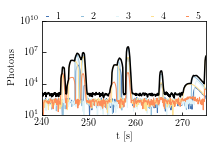

In [14]:
# Energy distributions
startpoint = 240.
width = 35
wavelengths = {
    "Detector 1": ["1", "#4575b4"],
    "Detector 5": ["2", "#91bfdb"],
    "Detector 8": ["3", "#e0f3f8"],
    "Detector 3": ["4", "#fee090"],
    "Detector 10": ["5", "#fc8d59"],
#     "Detector 2": ["6", "#d73027"],
}
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for detector in wavelengths.keys():
    # Random noise
    noise = np.abs(np.random.normal(2e2, 1e2, len(fd.t)))
    ax1.plot(fd.t,
             smooth(fd.measured[detector].values, 5) + noise,
             lw=lw, label=r"$\mathrm{%s}$" % wavelengths[detector][0], color=wavelengths[detector][1])
noise = np.abs(np.random.normal(2e2, 1e2, len(fd.t)))
total = smooth(fd.measured["Detector 1"].values, 5) + noise
for detector in wavelengths.keys():
    if detector == "Detector 1":
        continue
    # Random noise
    noise = np.abs(np.random.normal(2e2, 1e2, len(fd.t)))
    total += smooth(fd.measured[detector].values, 5) + noise
ax1.plot(fd.t, total, color='k')
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{t}\;[\mathrm{s}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Photons}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=5, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.set_ylim(1e1,1e10)
ax1.set_xlim(startpoint, startpoint + width)
plt.tight_layout()
plt.show()

In [15]:
figure.savefig(PICS + "MC_Example.pdf",
               bbox_inches='tight')

In [16]:
courseness = 1000

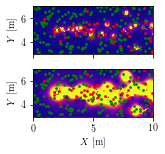

In [19]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
x_grid = np.linspace(0., config['geometry']['volume']['x_length'], courseness)
y_grid = np.linspace(0., config['geometry']['volume']['y_length'], courseness)
X, Y = np.meshgrid(x_grid, y_grid)
all_points = []
for i in range(0, len(x_grid)):
    all_points.append(np.vstack((X[i], Y[i])).T)
# The water current
x_vel = []
y_vel = []
grad = []
for j in range(0, len(x_grid)):
    # x_vel_tmp, y_vel_tmp, vel_abs = fd._current.velocities(all_points[j], q + config['advanced']['starting step'])
    grad_tmp = fd._current.gradients(all_points[j], 600)
    # x_vel.append(x_vel_tmp)
    # y_vel.append(y_vel_tmp)
    grad.append(grad_tmp)
grad = np.array(grad)
vmax = 1.
vmin = 0.
ax1.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 26., 0., 10.])
# ax.quiver(x_grid, y_grid, x_vel, y_vel, grad)
# The emitters
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
ax1.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
ax1.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# Exclusion
# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 50)
# the radius of the circle
r = config['geometry']['exclusion']['radius']
# compute x1 and x2
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
ax1.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# Additional options
# ax1.set_xlabel(r'$X\;[\mathrm{m}]$', fontsize=fontsize)
ax1.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
# ax1.title=ax1.set_title('Population t = %.f s' %(fd.t[q]), fontsize=fontsize)
ax1.set_xlim(0., 10.)
ax1.set_ylim(3., 7.)
# ----------------------------------------------------------------------------
x_grid = np.linspace(0., config['geometry']['volume']['x_length'], courseness)
y_grid = np.linspace(0., config['geometry']['volume']['y_length'], courseness)
X, Y = np.meshgrid(x_grid, y_grid)
all_points = []
for i in range(0, len(x_grid)):
    all_points.append(np.vstack((X[i], Y[i])).T)
# The water current
x_vel = []
y_vel = []
grad = []
for j in range(0, len(x_grid)):
    # x_vel_tmp, y_vel_tmp, vel_abs = fd._current.velocities(all_points[j], q + config['advanced']['starting step'])
    grad_tmp = fd._current.gradients(all_points[j], 600)
    # x_vel.append(x_vel_tmp)
    # y_vel.append(y_vel_tmp)
    grad.append(grad_tmp)
grad = np.array(grad)
vmax = 0.05
vmin = 0.
ax2.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 26., 0., 10.])
# ax.quiver(x_grid, y_grid, x_vel, y_vel, grad)
# The emitters
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
ax2.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
ax2.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# Exclusion
# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 50)
# the radius of the circle
r = config['geometry']['exclusion']['radius']
# compute x1 and x2
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
ax2.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# Additional options
ax2.set_xlabel(r'$X\;[\mathrm{m}]$', fontsize=fontsize)
ax2.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
# ax1.title=ax1.set_title('Population t = %.f s' %(fd.t[q]), fontsize=fontsize)
ax2.set_xlim(0., 10.)
ax2.set_ylim(3., 7.)
plt.tight_layout()
plt.show()

In [ ]:
figure.savefig(PICS + "MC_Pop.pdf",
               bbox_inches='tight')